# Web Scrapping of Arrow (American TV Serie) scripts
## From the site: https://subslikescript.com/ 
## by: Anna Luiza Gomes

## Pre-processing the data (scripts)

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import re

In [2]:
parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
resp = urllib.request.urlopen("https://subslikescript.com/series/Arrow-2193021")    #missing 4 episodes from season 7 
soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))

for link in soup.find_all('a', href=True):
    
    print(link['href'])

/
/movies
/series
/
/series
/series/Arrow-2193021/season-1/episode-1-Pilot
/series/Arrow-2193021/season-1/episode-2-Honor_Thy_Father
/series/Arrow-2193021/season-1/episode-3-Lone_Gunmen
/series/Arrow-2193021/season-1/episode-4-An_Innocent_Man
/series/Arrow-2193021/season-1/episode-5-Damaged
/series/Arrow-2193021/season-1/episode-6-Legacies
/series/Arrow-2193021/season-1/episode-7-Muse_of_Fire
/series/Arrow-2193021/season-1/episode-8-Vendetta
/series/Arrow-2193021/season-1/episode-9-Years_End
/series/Arrow-2193021/season-1/episode-10-Burned
/series/Arrow-2193021/season-1/episode-11-Trust_But_Verify
/series/Arrow-2193021/season-1/episode-12-Vertigo
/series/Arrow-2193021/season-1/episode-13-Betrayal
/series/Arrow-2193021/season-1/episode-14-The_Odyssey
/series/Arrow-2193021/season-1/episode-15-Dodger
/series/Arrow-2193021/season-1/episode-16-Dead_to_Rights
/series/Arrow-2193021/season-1/episode-17-The_Huntress_Returns
/series/Arrow-2193021/season-1/episode-18-Salvation
/series/Arrow-21930

In [3]:
href_tags = soup.find_all('a',href=True)   
hrefs = [tag.get('href') for tag in href_tags]

In [4]:
for count, value in enumerate(hrefs):
     print(count, value)

0 /
1 /movies
2 /series
3 /
4 /series
5 /series/Arrow-2193021/season-1/episode-1-Pilot
6 /series/Arrow-2193021/season-1/episode-2-Honor_Thy_Father
7 /series/Arrow-2193021/season-1/episode-3-Lone_Gunmen
8 /series/Arrow-2193021/season-1/episode-4-An_Innocent_Man
9 /series/Arrow-2193021/season-1/episode-5-Damaged
10 /series/Arrow-2193021/season-1/episode-6-Legacies
11 /series/Arrow-2193021/season-1/episode-7-Muse_of_Fire
12 /series/Arrow-2193021/season-1/episode-8-Vendetta
13 /series/Arrow-2193021/season-1/episode-9-Years_End
14 /series/Arrow-2193021/season-1/episode-10-Burned
15 /series/Arrow-2193021/season-1/episode-11-Trust_But_Verify
16 /series/Arrow-2193021/season-1/episode-12-Vertigo
17 /series/Arrow-2193021/season-1/episode-13-Betrayal
18 /series/Arrow-2193021/season-1/episode-14-The_Odyssey
19 /series/Arrow-2193021/season-1/episode-15-Dodger
20 /series/Arrow-2193021/season-1/episode-16-Dead_to_Rights
21 /series/Arrow-2193021/season-1/episode-17-The_Huntress_Returns
22 /series/Arro

In [5]:
hrefs[170] #the last with episode name

'/series/Arrow-2193021/season-8/episode-10-Fadeout'

In [6]:
len(hrefs)

172

## List with the episode's names

In [7]:
lista=[]   #list with the episode's names

for i in range(5,171):
    lista.append(hrefs[i])
      

In [8]:
lista[0]  #first episode

'/series/Arrow-2193021/season-1/episode-1-Pilot'

In [9]:
lista[165] #last episode

'/series/Arrow-2193021/season-8/episode-10-Fadeout'

In [10]:
lista[40]   #episode in portuguese

'/series/Arrow-2193021/season-2/episode-18-Deathstroke'

In [11]:
len(lista)        #its missing 4 episodes from : season 7 (12,13,14) and season 3 (episode 4)

166

In [12]:
df_lista = pd.DataFrame(lista) #puting the episode's name in a list

In [13]:
df_lista.head()

,0
0,/series/Arrow-2193021/season-1/episode-1-Pilot
1,/series/Arrow-2193021/season-1/episode-2-Honor...
2,/series/Arrow-2193021/season-1/episode-3-Lone_...
3,/series/Arrow-2193021/season-1/episode-4-An_In...
4,/series/Arrow-2193021/season-1/episode-5-Damaged


## List with the scripts

In [14]:
eps = []    #list with the scripts

for i in  range(5,171):
  url_base= 'https://subslikescript.com'
  url_final = url_base + hrefs[i]
  page = requests.get(url_final)
  soup = BeautifulSoup(page.content, "lxml")
  results = soup.find_all("div", {"class": "full-script"})
  eps.append(results)


In [15]:
len(eps)

166

In [16]:
type(eps)

list

In [17]:
chars = ['<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n      \r\n</script> ','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n      \r\n</script> ','OpenSubtitles recommends using Nord VPN from 3.49 USD/month ----&gt; osdb.link/vpn ','Greg, move your head!','OpenSubtitles recommends using Nord VPN from 3.49 USD/month ----&gt; osdb.link/vpn','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n      \r\n</script>','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n      \r\n</script>','(adsbygoogle = window.adsbygoogle || []).push({});','[<div class="full-script">','<br/><br/>','<br/>', '</div>]','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n     \r\n</script>','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n     \r\n</script>', 'OLIVER:My name is Oliver Queen.For five years, I was strandedon an island with only one goal:Survive.Oliver Queen is alive.OLIVER:Now, I will fulfill my father\'s dying wish......to use the list of names he left me......and bring down thosewho are poisoning my city.To do this,I must become someone else.I must become something else.','My name is Oliver Queen.After five years in hell,I have come home with only one goal:To save my city.Now others have joined my crusade.To them, I\'m Oliver Queen.To the rest of Starling City......I am someone else.I am something else.']

In [18]:
txt=[]
for i in range(len(eps)):
  txt.append(str(eps[i]))
  for c in chars:
    txt[i] = txt[i].replace(c,'')
    txt[i] = txt[i].replace('1','I')
    txt[i] = txt[i].replace('\\','') #does not work!

In [19]:
len(txt)

166

In [20]:
# txt[40]   # in portuguese...

## Creating the dataframe with the scripts

In [21]:
df_ep = pd.DataFrame(txt,columns=['Episodios'])

In [22]:
df_ep.shape

(166, 1)

In [23]:
df_ep.head()

,Episodios
0,The name of the islandthey found me on is Lian...
1,[PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...
2,"My name is Oliver Queen.To my family, I am the..."
3,"My name is Oliver Queen.For 5 years, I was str..."
4,"OLIVER:My name is Oliver Queen.For five years,..."


In [24]:
# Removing punctuation
df_ep['text_processed'] = \
df_ep['Episodios'].map(lambda x: re.sub('[,\.!?]', ' ', x))

In [25]:
# Convert the titles to lowercase
df_ep['text_processed'] = \
df_ep['text_processed'].map(lambda x: x.lower())     

In [26]:
df_ep['text_processed'].head()

0    the name of the islandthey found me on is lian...
1    [panting][grunts][speaking in foreign language...
2    my name is oliver queen to my family  i am the...
3    my name is oliver queen for 5 years  i was str...
4    oliver:my name is oliver queen for five years ...
Name: text_processed, dtype: object

## First dataset with the raw script, the processed script and the episode name


In [27]:
df_parcial = pd.concat([df_lista, df_ep], axis=1) 

In [28]:
df_parcial.columns = ['nome_ep', 'Episodios','text_processed']

In [29]:
df_parcial = df_parcial.drop(df_parcial.index[[40]]) #removing line 40

In [30]:
df_parcial = df_parcial.reset_index(drop=True)  #reseting the index

In [31]:
df_parcial.tail()

,nome_ep,Episodios,text_processed
160,/series/Arrow-2193021/season-8/episode-6-Reset,"PREVIOUSLY ON ""ARROW""...THIS PLACE LOOKSEXACTL...","previously on ""arrow"" this place looksexactl..."
161,/series/Arrow-2193021/season-8/episode-7-Purga...,"Previously on ""Arrow""...-I need your help, roy...","previously on ""arrow"" -i need your help roy..."
162,/series/Arrow-2193021/season-8/episode-8-Crisi...,Previously on Crisison Infinite Earths...There...,previously on crisison infinite earths there...
163,/series/Arrow-2193021/season-8/episode-9-Green...,bianca!bianca bertinelli?who the hell are you...,bianca bianca bertinelli who the hell are you...
164,/series/Arrow-2193021/season-8/episode-10-Fadeout,[Oliver]My name is Oliver Queen.[gunshot][Oliv...,[oliver]my name is oliver queen [gunshot][oliv...


In [32]:
df_parcial.shape

(165, 3)

In [33]:
df_parcial.isnull().sum()

nome_ep           0
Episodios         0
text_processed    0
dtype: int64

----------------------------------------------------------------------------

# Wordcloud

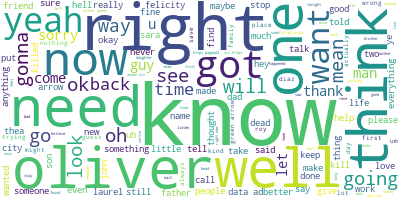

In [34]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed texts together.
long_string = ','.join(list(df_parcial['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [35]:
# df_parcial['text_processed'].values #todo o dataset

# Tokenization and remotion of stopwords (english) 

In [36]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu','arrow','really', 'look', 'tell', 'mean', 'make','way','see','take',  'use','time','man','data', 'ad', 'would', 'think','script', 'could' ,'like','want', 'come',  'one', 'yeah', 'get','go','got','right','know','gonna','need','oh','well','ok','let','back','going','hey'])
print(stopwords.words() [620:680])




['your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at']


[nltk_data] Downloading package stopwords to /home/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = df_parcial.text_processed.values.tolist()   
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30]) 

['name', 'islandthey', 'found', 'lian', 'yu', 'mandarin', 'purgatory', 'stranded', 'five', 'years', 'dreamt', 'rescueevery', 'cold', 'black', 'night', 'since', 'five', 'years', 'thought', 'goal', 'survive', 'survive', 'day', 'return', 'home', 'island', 'held', 'many', 'dangers', 'live']


In [38]:
len(data_words)

165

In [39]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])


[(0, 3), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 5), (17, 1), (18, 4), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 4), (27, 1), (28, 1), (29, 1)]


# Model training

In [40]:
from pprint import pprint

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"oliver" + 0.004*"good" + 0.004*"us" + 0.004*"city" + '
  '0.004*"something" + 0.003*"felicity" + 0.003*"sorry" + 0.003*"queen" + '
  '0.003*"thank" + 0.003*"find"'),
 (1,
  '0.007*"oliver" + 0.005*"city" + 0.004*"us" + 0.004*"good" + '
  '0.003*"something" + 0.003*"sorry" + 0.003*"queen" + 0.003*"laurel" + '
  '0.003*"thea" + 0.003*"help"'),
 (2,
  '0.008*"oliver" + 0.006*"city" + 0.005*"us" + 0.004*"good" + 0.004*"sorry" + '
  '0.003*"felicity" + 0.003*"laurel" + 0.003*"something" + 0.003*"find" + '
  '0.003*"never"')]


In [67]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('Data/prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'Data/prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002673  0.000297       1        1  20.208819
1      0.001022 -0.002047       2        1  27.333471
2      0.001651  0.001749       3        1  52.457710, topic_info=           Term         Freq        Total Category  logprob  loglift
512      oliver  2514.000000  2514.000000  Default  30.0000  30.0000
673   something  1006.000000  1006.000000  Default  29.0000  29.0000
307        good  1318.000000  1318.000000  Default  28.0000  28.0000
568       queen   895.000000   895.000000  Default  27.0000  27.0000
774          us  1411.000000  1411.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
746        told   356.444404   675.001432   Topic3  -6.1639   0.0066
533      people   390.429783   772.424288   Topic3  -6.0728  -0.0371
741     thought   361.742060   697.826406   Topic3  -6.1491  -0.0119
735       thing   356.185507   680.722944   Topic3  -6.1646  -0.0025
3109       thea   358.908545   763.650092   Topic3  -6.1570  -0.1099

[316 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
18         1  0.229660  adsbygoogle
18         2  0.243170  adsbygoogle
18         3  0.526868  adsbygoogle
6845       2  0.394335         agoi
6845       3  0.394335         agoi
...      ...       ...          ...
815        2  0.257419          yes
815        3  0.552975          yes
43763      1  0.172723        zetas
43763      2  0.172723        zetas
43763      3  0.690890        zetas

[644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

## Topicos

1 - 
2 - 
3 - 

In [46]:
topic_scores = [[topic_score[1] for topic_score in sent] for sent in doc_lda]

#topics
#1 - Episodios mais genericos/aventura/acao (0,  '0.008*"oliver" + 0.005*"us" + 0.004*"city" + 0.004*"something" + '  '0.004*"good" + 0.004*"sorry" + 0.003*"thank" + 0.003*"never" + 0.003*"find" '  '+ 0.003*"help"')
#2 - Episodios com mais romance? visto que laurel e felicity foram par romantico de oliver (personagem principal)(1,  '0.008*"oliver" + 0.005*"city" + 0.005*"good" + 0.005*"us" + ''0.004*"felicity" + 0.004*"laurel" + 0.003*"sorry" + 0.003*"something" + '  '0.003*"queen" + 0.003*"uh"')
#3  - Episodios mais familia (2,  '0.007*"oliver" + 0.005*"city" + 0.004*"us" + 0.003*"good" + 0.003*"thea" + '0.003*"said" + 0.003*"felicity" + 0.003*"people" + 0.003*"queen" + '  '0.003*"father"')]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----------------------------------------------------------------------------------------------------------

# Dataframe with scores of each topic, where each line is the index of txt (script of the episode)


In [47]:
df_topics = pd.DataFrame(topic_scores)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
len(df_topics)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165

In [49]:
df_topics.tail()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
160,0.146809,0.329372,0.523819
161,0.730483,0.267691,NaN
162,0.100775,0.896346,NaN
163,0.104895,0.885359,NaN
164,0.269644,0.186685,0.543671


In [50]:
df_topics.fillna(0,  inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df_topics.loc[4,:]   #scores dos topicos do script 4 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.985026
1    0.010082
2    0.000000
Name: 4, dtype: float64

# Dataframe concat
## Concatenating the dataset with the raw script, the processed script and the episode name (df_parcial) with Dataframe with scores of each topic (df_topics)

In [52]:
df_concat = pd.concat([df_parcial, df_topics], axis=1) 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
df_concat.tail()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nome_ep,Episodios,text_processed,0,1,2
160,/series/Arrow-2193021/season-8/episode-6-Reset,"PREVIOUSLY ON ""ARROW""...THIS PLACE LOOKSEXACTL...","previously on ""arrow"" this place looksexactl...",0.146809,0.329372,0.523819
161,/series/Arrow-2193021/season-8/episode-7-Purga...,"Previously on ""Arrow""...-I need your help, roy...","previously on ""arrow"" -i need your help roy...",0.730483,0.267691,0.000000
162,/series/Arrow-2193021/season-8/episode-8-Crisi...,Previously on Crisison Infinite Earths...There...,previously on crisison infinite earths there...,0.100775,0.896346,0.000000
163,/series/Arrow-2193021/season-8/episode-9-Green...,bianca!bianca bertinelli?who the hell are you...,bianca bianca bertinelli who the hell are you...,0.104895,0.885359,0.000000
164,/series/Arrow-2193021/season-8/episode-10-Fadeout,[Oliver]My name is Oliver Queen.[gunshot][Oliv...,[oliver]my name is oliver queen [gunshot][oliv...,0.269644,0.186685,0.543671


In [ ]:
# df_concat2.to_csv('scripts1.csv',  sep=';')

# Dataset with ratings and amount of ratings
## manually generated from the IMDb page ( https://www.imdb.com/title/tt2193021/episodes?ref_=tt_eps_sm )

In [54]:
ratings = pd.read_csv('Data/ratings2.csv', sep=",")

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
ratings.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,episodios,nota_imdb,qtd_reviews
0,/series/Arrow-2193021/season-1/episode-1-Pilot,8.5,7572
1,/series/Arrow-2193021/season-1/episode-2-Honor...,8.2,5731
2,/series/Arrow-2193021/season-1/episode-3-Lone_...,8.4,5367
3,/series/Arrow-2193021/season-1/episode-4-An_In...,8.3,5071
4,/series/Arrow-2193021/season-1/episode-5-Damaged,8.6,5011


In [56]:
ratings.isnull().sum()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


episodios      0
nota_imdb      0
qtd_reviews    0
dtype: int64

In [57]:
ratings.shape

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(165, 3)

# Final dataset
## Dataset with the episode name, the script, the script processed , column with score value of topic 0, column with score value of topic 1, column with score value of topic 2, the imdb rating, the amount of reviews and the predominant topic 

In [58]:
dataset = pd.concat([df_concat, ratings], axis=1) 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
dataset.drop('episodios', axis=1, inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
topicos = dataset.loc[:, [0, 1, 2]]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
dataset.loc[:, [0, 1, 2]]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
0,0.160072,0.018992,0.820936
1,0.950948,0.042689,0.000000
2,0.089079,0.041158,0.869763
3,0.792778,0.020530,0.186692
4,0.985026,0.010082,0.000000
...,...,...,...
160,0.146809,0.329372,0.523819
161,0.730483,0.267691,0.000000
162,0.100775,0.896346,0.000000
163,0.104895,0.885359,0.000000


In [62]:
dataset['Topic'] = topicos.idxmax(axis=1)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
dataset.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nome_ep,Episodios,text_processed,0,1,2,nota_imdb,qtd_reviews,Topic
0,/series/Arrow-2193021/season-1/episode-1-Pilot,The name of the islandthey found me on is Lian...,the name of the islandthey found me on is lian...,0.160072,0.018992,0.820936,8.5,7572,2
1,/series/Arrow-2193021/season-1/episode-2-Honor...,[PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...,[panting][grunts][speaking in foreign language...,0.950948,0.042689,0.000000,8.2,5731,0
2,/series/Arrow-2193021/season-1/episode-3-Lone_...,"My name is Oliver Queen.To my family, I am the...",my name is oliver queen to my family i am the...,0.089079,0.041158,0.869763,8.4,5367,2
3,/series/Arrow-2193021/season-1/episode-4-An_In...,"My name is Oliver Queen.For 5 years, I was str...",my name is oliver queen for 5 years i was str...,0.792778,0.020530,0.186692,8.3,5071,0
4,/series/Arrow-2193021/season-1/episode-5-Damaged,"OLIVER:My name is Oliver Queen.For five years,...",oliver:my name is oliver queen for five years ...,0.985026,0.010082,0.000000,8.6,5011,0


In [64]:
dataset.shape

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(165, 9)

In [65]:
dataset.to_csv('Data/scripts.csv',  sep=';')

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
